# GoBike's Bike Renter
## by Petar Janosevic

## Investigation Overview


> In this dataset I wanted to find out who GoBike's bike renter are. I wanted to know the relationship between genders and ages. My main interest was to find out more about GoBike's main customer/subscribers and what do they use the bikes for the most. My assumption ist that most people use GoBike to commute.


## Dataset Overview

> This dataset has 183'412 rentals which include the duration of riding the bike, some informations about the bike user like gender and user type, start and end stations etc.. The location is the San Francisco Bay area. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
from pandas.api.types import CategoricalDtype
sb.set_style('darkgrid')
base_color = sb.color_palette()[0]

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('SanFrancisco-bike.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [3]:
# Data wrangling part
# converting to datetime
bike['start_time'] = bike['start_time'].astype('datetime64[ns]')
bike['end_time'] = bike['end_time'].astype('datetime64[ns]')
#create date and hour column
bike['start_day'] = bike['start_time'].dt.weekday_name
bike['start_time_hour'] = bike['start_time'].dt.hour
# convert gender from string into a categorical object.
bike['member_gender'] = bike['member_gender'].astype(CategoricalDtype(categories=['Male','Female', 'Other']))

## Mean Duration

The chart is plotted on a logarithmic scale and represents the mean duration in seconds. The distribution is unimodal. It's right skewed and the mean lies near 700 which means that people tend to rent bikes for circa 12 minutes. This is a pro fact for the commuting argument. 

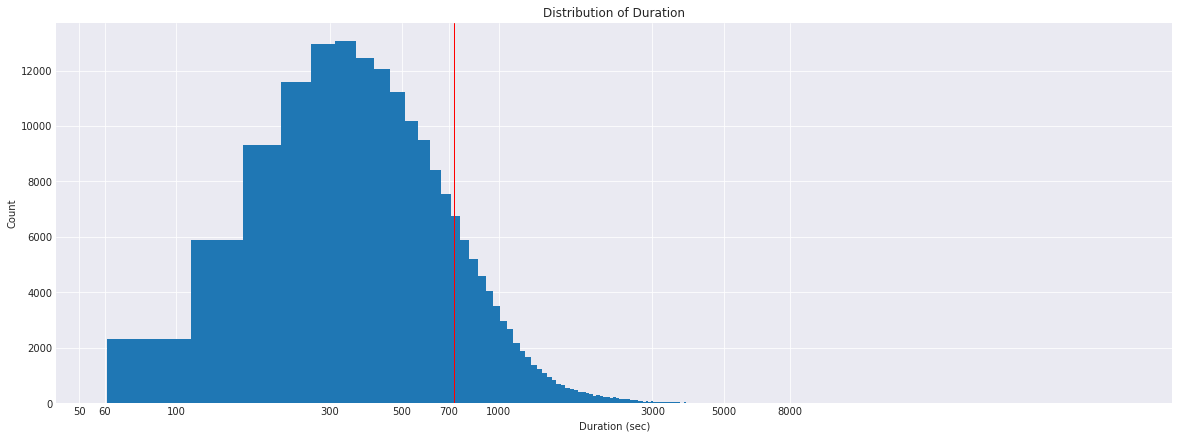

In [4]:
plt.figure(figsize = [20, 7])

max_duration = bike.duration_sec.max()
min_duration = bike.duration_sec.min()
bins = np.arange(min_duration, max_duration + 10, 50)
plt.hist(data = bike, x = 'duration_sec', bins = bins)
plt.xscale('log')
ticks = [50, 60, 100, 300, 500, 700, 1000, 3000, 5000, 8000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.axvline(bike.duration_sec.mean(), color = 'red', linewidth = 1)
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Distribution of Duration');

## Mean Duration per Day

This bar chart shows the mean duration distribution on every day of the week. The mean is much higher on the weekend than during the week. The mean for weekdays is lower and for weekends higher than the actual mean. This can be explained with the fact that people use bikes during the week to commute.

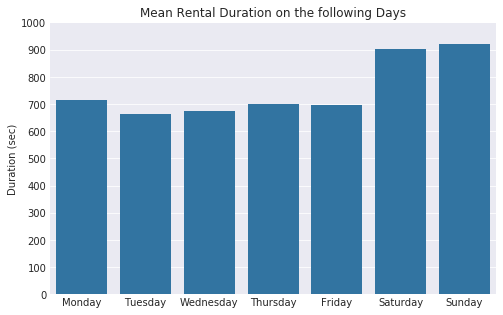

In [5]:
plt.figure(figsize = [8, 5])

dayorder = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
yticks = np.arange(0, 1100, 100)

g = sb.barplot(data = bike, x = 'start_day', y = 'duration_sec', ci = None, order = dayorder, color = base_color)
g.set_yticks(yticks)
g.set_yticklabels(yticks)
plt.xlabel('')
plt.ylabel('Duration (sec)')
plt.title('Mean Rental Duration on the following Days');

## Hourly Rentals 

This is a timeplot which represents when a bike was rent by the exact hour. We can see that this chart is bimodal, having two peeks in the morning and evening. These two peeks stand for rush hour periods. During rush hour people commute the most. This strenghtens the argument of people mostly using GoBike for commuting to work, school etc..

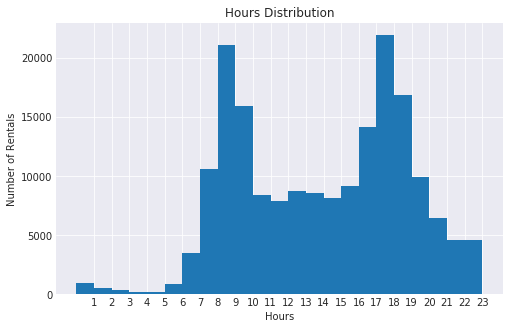

In [6]:
# plotting hours distribution
plt.figure(figsize = [8, 5])
bins = np.arange(0, 24, 1)
plt.hist(data = bike, x = bike.start_time_hour, bins = bins)
ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.xlabel('Hours')
plt.ylabel('Number of Rentals')
plt.title('Hours Distribution');

In [7]:
# Data wrangling part
# dropping wrong data for the categorizing part
bike.drop(bike[bike['member_birth_year'] <= 1925.0].index, inplace = True)

# creating age stage columns for categorizing part
conditions = [
    (bike['member_birth_year'] >= 1989) & (bike['member_birth_year'] < 2002),
    (bike['member_birth_year'] >= 1959) & (bike['member_birth_year'] < 1989),
    (bike['member_birth_year'] >= 1927) & (bike['member_birth_year'] < 1959),]
name = ['Young Adults', 'Middle Age', 'Retired']

bike['age_stage'] = np.select(conditions, name, default = 'Not Specified')

## Amount of Rentals by Different Age Stages and User Types

This bar charts shows so much. It shows that we have more male than other genders and most rentals were done by people in the 'commuting' age. This also shows that there are much more subscribers than customers in every matter, in every comparison. This company manages to keep their bike renters very well.

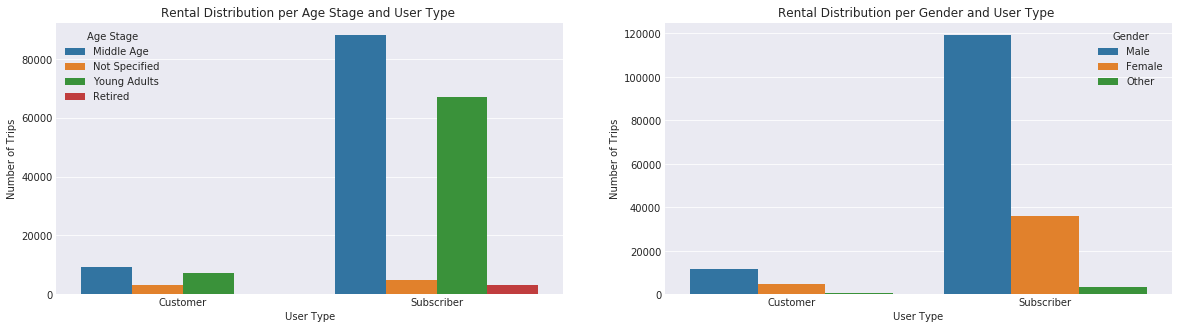

In [9]:
# multiple plots
plt.figure(figsize = [20, 5])

# chart on left, customers
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
fig = sb.countplot(data = bike, x = "user_type", hue = "age_stage")
fig.set_xlabel('User Type')
fig.set_ylabel('Number of Trips')
plt.title('Rental Distribution per Age Stage and User Type ')
fig.legend(title = 'Age Stage');

# chart on right, subscribers
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
fig = sb.countplot(data = bike, x = "user_type", hue = "member_gender")
fig.set_xlabel('User Type')
fig.set_ylabel('Number of Trips')
plt.title('Rental Distribution per Gender and User Type ')
fig.legend(title = 'Gender');

## Mean Distribution by Different Age Stages and User Types

This pointplot shows that male have a lower mean than the other genders, which is quite interesting. If we continue to believe that most people use GoBike to commute, then we also have to assume that it's mostly men who uses it to commute since the other gender have a much higher mean. A much higher than the average, not only the mean compared to men. The color shifts from lightblue to dark blue, from male to female and then other. This chart reveals a deficit of the company - the lack of collecting data of their consumer.

In [10]:
# new columns for third visualization
bike_customer = bike[bike['user_type'] == "Customer"]
bike_subscriber = bike[bike['user_type'] == "Subscriber"]

# for saving space, do the codes for the two graphs below here
plot_order = ['Young Adults', 'Middle Age', 'Retired', 'Not Specified']
yticks = np.arange(500, 4500, 500)

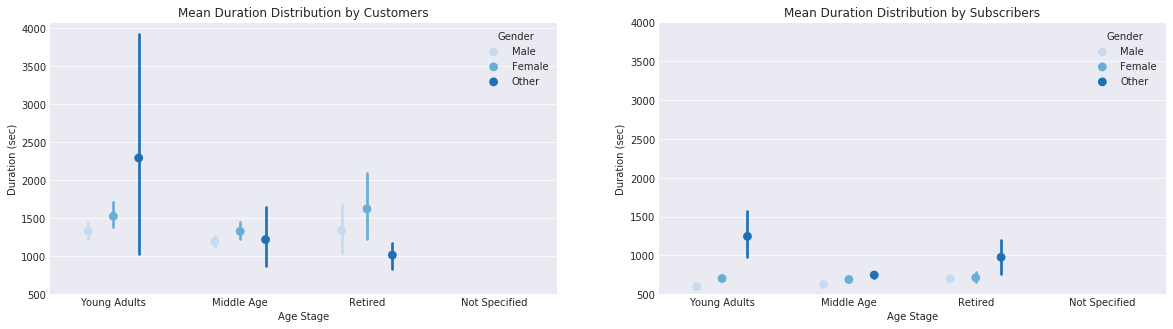

In [11]:
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
ax = sb.pointplot(data = bike, x = bike_customer['age_stage'], y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4, order = plot_order)
plt.title('Mean Duration Distribution by Customers')
plt.ylabel('Duration (sec)')
plt.xlabel('Age Stage')
ax.legend(title = 'Gender')
plt.yticks(np.arange(500, 4500, 500));
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
ax = sb.pointplot(data = bike, x = bike_subscriber['age_stage'], y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4, order = plot_order)
plt.title('Mean Duration Distribution by Subscribers')
plt.ylabel('Duration (sec)')
plt.xlabel('Age Stage')
ax.legend(title = 'Gender')
plt.yticks(np.arange(500, 4500, 500));

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 390607 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
